<a href="https://colab.research.google.com/github/meriemdouider1/mois1-mois2/blob/main/groupes%20de%20variables/%20modelisation%20rfecv%20gradient%20boosting%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.metrics import recall_score

In [2]:
Cl = '/content/apprentissage.xlsx' 
apprentissage= pd.read_excel(Cl, sheet_name=0,header=0,index_col=False, keep_default_na=True)

In [3]:
del apprentissage["Source"] 
del apprentissage["CodeSite"] 
apprentissage

,X_long,Y_lat,Cs_longia,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,1,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,1,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,1,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.167180,27.157730,0,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
4,-13.201560,27.165070,0,0.000000,0.000000,0.000000,0.000000,0.299265,0,74,0,0,0,0,0,0,0,0,26,2490,520,50,30,44,0,0,44,1920,3010,612,202,202,0,15266,299,121,23,73,12,0,...,29.400000,27.799999,25.299999,22.900000,12.2,13.0,14.3,14.9,15.800000,17.400000,18.900000,20.000000,19.500000,18.000000,15.400000,13.0,1.20,1.34,1.44,1.53,1.65,1.87,2.06,2.14,2.12,1.98,1.63,1.41,4.3,4.5,5.1,5.6,5.8,6.2,6.6,6.3,5.7,4.6,3.8,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,-5.366667,35.766667,1,8.495770,105.550156,8.691405,15.116930,0.698221,0,0,0,0,18,30,13,0,39,0,0,1390,510,70,20,78,2,0,80,880,1950,647,153,241,0,14903,543,78,5,92,2,0,...,25.700001,22.100000,18.700001,16.500000,9.4,9.6,11.5,13.1,15.400000,18.500000,21.200001,21.700001,19.700001,16.100000,12.800000,10.5,1.09,1.14,1.20,1.27,1.47,1.74,1.96,2.07,1.93,1.65,1.35,1.19,4.1,4.6,4.6,4.3,4.1,3.9,3.9,4.1,4.0,4.0,4.0,4.2
199,-5.816667,35.783333,1,0.000000,0.000000,0.000000,0.000000,1.725019,0,0,0,0,0,0,0,0,0,0,100,2050,640,0,10,92,0,0,92,1400,2690,593,254,146,0,14838,478,42,1,94,1,0,...,25.700001,22.400000,19.000000,16.100000,9.6,10.7,12.4,13.9,16.000000,19.400000,21.200001,21.700001,20.100000,16.799999,13.400000,10.5,1.10,1.15,1.21,1.28,1.48,1.73,1.97,2.05,1.92,1.64,1.37,1.21,3.7,4.3,4.6,4.1,3.8,3.7,3.7,3.7,3.3,3.6,3.8,4.0
200,-5.366667,35

In [4]:
Cl2 = '/content/test.xlsx' 
test= pd.read_excel(Cl2, sheet_name=0,header=0,index_col=False, keep_default_na=True)

In [5]:
test

,Source,CodeSite,X_long,Y_lat,Cs_longia,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,Bennouna,Z01-S07-G01,-13.185620,27.157940,0,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.5,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
1,Bennouna,Z01-S12-G01,-13.214230,27.166700,1,0.000000,0.000000,0.000000,0.000000,0.321313,0,59,0,0,0,0,0,0,0,0,41,3420,280,40,20,19,0,0,19,3190,3710,637,76,18,0,15324,288,135,25,68,...,29.500000,28.000000,25.400000,23.000000,12.1,12.9,14.2,14.8,15.700000,17.299999,18.799999,19.900000,19.500000,17.900000,15.3,12.9,1.20,1.35,1.45,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.42,4.2,4.8,5.4,5.7,5.8,6.2,6.6,6.3,5.8,4.4,3.6,3.8
2,Bennouna,Z01-S12-G02,-13.214230,27.166700,1,0.000000,0.000000,0.000000,0.000000,0.321313,0,59,0,0,0,0,0,0,0,0,41,3420,280,40,20,19,0,0,19,3190,3710,637,76,18,0,15324,288,135,25,68,...,29.500000,28.000000,25.400000,23.000000,12.1,12.9,14.2,14.8,15.700000,17.299999,18.799999,19.900000,19.500000,17.900000,15.3,12.9,1.20,1.35,1.45,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.42,4.2,4.8,5.4,5.7,5.8,6.2,6.6,6.3,5.8,4.4,3.6,3.8
3,Bennouna,Z01-S19-G01,-9.490150,29.219060,1,0.074234,6.159595,0.397598,0.442057,0.172458,0,59,0,0,0,0,22,0,19,0,0,2800,600,60,20,85,1,0,86,2190,3370,634,447,57,0,15302,529,77,5,90,...,27.500000,24.200001,20.299999,17.000000,4.3,5.7,8.4,10.5,12.600000,15.700000,18.799999,18.900000,16.500000,13.200000,9.3,5.9,0.74,0.79,0.86,0.99,1.09,1.24,1.27,1.32,1.32,1.19,0.97,0.85,3.5,3.4,4.2,4.7,5.7,6.0,4.5,4.4,4.7,3.8,3.2,3.1
4,Bennouna,Z02-S03-G01,-9.553340,30.364340,0,0.000000,0.000000,0.000000,0.000000,0.561624,0,0,0,0,0,0,0,0,11,0,89,1510,270,20,10,78,0,0,78,1230,1770,611,206,147,0,15097,313,89,22,82,...,27.799999,25.900000,23.100000,20.100000,10.6,11.9,13.5,14.4,15.600000,17.200001,17.400000,17.900000,17.400000,15.600000,12.8,9.8,1.14,1.23,1.31,1.46,1.61,1.85,2.01,2.06,1.99,1.74,1.43,1.26,3.3,3.8,4.0,4.6,4.4,4.5,4.6,4.8,3.6,3.3,3.6,3.3
5,Bennouna,Z02-S03-G02,-9.552312,30.363460,0,0.000000,0.000000,0.000000,0.000000,0.561624,0,0,0,0,0,0,0,0,11,0,89,1510,270,20,10,78,0,0,78,1230,1770,611,206,147,0,15097,313,89,22,82,...,27.799999,25.900000,23.100000,20.100000,10.6,11.9,13.5,14.4,15.600000,17.200001,17.400000,17.900000,17.400000,15.600000,12.8,9.8,1.14,1.23,1.31,1.46,1.61,1.85,2.01,2.06,1.99,1.74,1.43,1.26,3.3,3.8,4.0,4.6,4.4,4.5,4.6,4.8,3.6,3.3,3.6,3.3
6,Bennouna,Z02-S03-G04,-9.561531,30.357880,0,0.000000,0.000000,0.000000,0.000000,0.401581,0,0,0,0,0,0,0,0,0,0,100,2430,550,50,40,63,1,0,64,1840,2970,642,421,144,0,15139,333,90,28,81,...,27.500000,25.700001,23.000000,20.000000,10.6,11.8,13.4,14.2,15.400000,17.000000,17.299999,17.799999,17.299999,15.500000,12.8,9.8,1.14,1.23,1.31,1.46,1.62,1.85,2.02,2.07,1.99,1.75,1.43,1.27,3.6,3.9,4.3,4.5,4.3,4.7,4.5,4.7,3.7,3.5,3.7,3.4
7,Bennouna,Z02-S05-G04,-9.478637,30.353610,0,0.000000,0.000000,0.000000,0.000000,0.490648,0,0,0,0,0,0,38,12,0,0,50,2290,630,60,20,77,1,0,78,1620,2890,645,425,147,0,15252,397,110,28,83,...,29.200001,27.000000,23.900000,20.600000,9.9,11.4,13.2,14.3,15.700000,17.400000,18.000000,18.700001,17.

In [6]:
X_app = apprentissage.loc[:, apprentissage.columns != 'Cs_longia']
Y_app = apprentissage.Cs_longia
X_test = test.loc[:, test.columns != 'Cs_longia']
Y_test = test.Cs_longia

In [7]:
feature_selected=['Min_IRM', 'Amp1_TempJ', 'Max_TempN', 'VarT_ann_NDVI', 'Var_EVI','ProfAbs_Sub', 'IR_Moy', 'Rad_Mai', 'Tmax_Fev', 'Tmax_Avril']
x_app1=X_app[feature_selected]

In [8]:
x_test1=X_test[feature_selected]

In [9]:
 x_app1

,Min_IRM,Amp1_TempJ,Max_TempN,VarT_ann_NDVI,Var_EVI,ProfAbs_Sub,IR_Moy,Rad_Mai,Tmax_Fev,Tmax_Avril
0,2690,96,14561,2,1,4143,1.968750,24920,21.799999,22.600000
1,3350,312,14705,13,0,1828,1.375000,24082,22.600000,24.600000
2,3350,312,14705,13,0,1828,1.375000,24082,22.600000,24.600000
3,2350,295,14719,1,35,6537,7.515625,24002,22.799999,24.700001
4,1920,299,14660,0,6,118,8.593750,24067,22.799999,24.799999
...,...,...,...,...,...,...,...,...,...,...
198,880,543,14675,52,47,0,25.093750,23341,15.400000,18.900000
199,1400,478,14743,51,7,846,6.578125,23582,15.500000,18.700001
200,1080,452,14666,84,70,1729,15.914062,23425,15.500000,18.900000
201,620,0,0,37,40,2786,14.812500,23716,17.100000,19.799999


In [10]:
x_test1

,Min_IRM,Amp1_TempJ,Max_TempN,VarT_ann_NDVI,Var_EVI,ProfAbs_Sub,IR_Moy,Rad_Mai,Tmax_Fev,Tmax_Avril
0,2930,306,14690,8,0,0,9.304688,24019,22.600000,24.600000
1,3190,288,14590,1,1,1470,11.070312,24067,23.000000,24.900000
2,3190,288,14590,1,1,1470,11.070312,24067,23.000000,24.900000
3,2190,529,14774,64,2,676,9.945312,23917,18.000000,22.700001
4,1230,313,14677,50,22,3290,3.179688,23508,19.500000,21.900000
5,1230,313,14677,50,22,3067,3.179688,23508,19.500000,21.900000
6,1840,333,14637,33,32,3374,2.703125,23453,19.400000,21.799999
7,1620,397,14660,55,29,3243,1.187500,23530,20.299999,23.200001
8,2560,448,14714,19,33,3253,1.523438,23515,21.400000,25.299999
9,2350,493,14714,27,25,2530,1.882812,23714,21.600000,25.600000


In [11]:
Classifier = GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1)

In [12]:
Classifier.fit(x_app1,Y_app)

GradientBoostingClassifier(max_depth=2, max_features=2, min_samples_leaf=2,
                           n_estimators=225, random_state=0, subsample=1)

In [13]:
preds = Classifier.predict(x_test1)

In [14]:
preds

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1])

In [15]:
cf_matrix = confusion_matrix(Y_test, preds)
print(cf_matrix)

[[25  6]
 [ 4 16]]


In [16]:
###Recall
def recall(y_val, preds):
  recall=recall_score(y_val, preds)
  return recall
def MCC(y_val, preds):
  MCC= matthews_corrcoef(y_val, preds) 
  return MCC
### MCC
def MCC(y_val, preds):
  MCC= matthews_corrcoef(y_val, preds) 
  return MCC
### sensibilite
def sensibilite(y_val, preds):
  cf_matrix = confusion_matrix(y_val, preds)
  sensibilite =  (cf_matrix[1,1])/(cf_matrix[1,1]+cf_matrix[1,0])
  return sensibilite
### specifite 
def specifite(y_val, preds):
  cf_matrix = confusion_matrix(y_val, preds)
  specifite =  (cf_matrix[0,0])/(cf_matrix[0,0]+cf_matrix[0,1])
  return specifite 
### kappa
def kappa(y_val, preds):
  value = cohen_kappa_score(y_val,preds)
  return value
### balancedacc
def balancedacc(y_val, preds):
  cf_matrix = confusion_matrix(y_val, preds)
  sen = (cf_matrix[1,1])/(cf_matrix[1,1]+cf_matrix[1,0])
  spe = (cf_matrix[0,0])/(cf_matrix[0,0]+cf_matrix[0,1])
  value = (sen + spe)/2
  return value
def présicion_positive(y_val, preds):
  cf_matrix = confusion_matrix(y_val, preds)
  pre_pos =  (cf_matrix[1,1])/(cf_matrix[1,1]+cf_matrix[0,1])
  return pre_pos
def présicion_négative(y_val, preds):
  cf_matrix = confusion_matrix(y_val, preds)
  pre_pos =  (cf_matrix[0,0])/(cf_matrix[0,0]+cf_matrix[1,0])
  return pre_pos
  
### courbe roc
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

In [17]:
MCC(Y_test, preds)

0.5978354457069218

In [18]:
recall(Y_test, preds)

0.8

In [19]:
sensibilite(Y_test, preds)

0.8

In [20]:
specifite(Y_test, preds)

0.8064516129032258

In [21]:
présicion_négative(Y_test, preds)

0.8620689655172413

In [22]:
présicion_positive(Y_test, preds)

0.7272727272727273

In [23]:
balancedacc(Y_test, preds)

0.8032258064516129

In [24]:
kappa(Y_test, preds)

0.5958795562599049

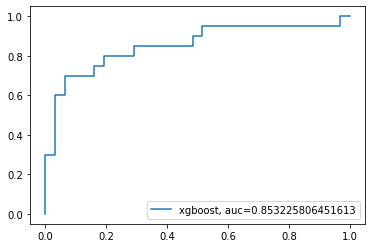

In [25]:
y_pred_proba = Classifier.predict_proba(x_test1)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="xgboost, auc="+str(auc))
plt.legend(loc=4)
plt.show()